In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df = df.drop(['education'], axis=1) 

In [4]:
df = df.drop(['currentSmoker'], axis=1) 

In [5]:
df=df.dropna()

In [6]:
x = df.iloc[:,0:13]  #independent columns
y = df.iloc[:,-1]    #target column

In [7]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [10]:
RFC_clf=RandomForestClassifier(n_estimators=300,min_samples_split=5,max_features='auto')

In [11]:
RFC_clf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=300)

In [12]:
RFC_predict = RFC_clf.predict(X_test)

In [13]:
#accuracy
RFC_accuracy = accuracy_score(y_test,RFC_predict)
print(f"Using RFC we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using RFC we get an accuracy of 85.89%


In [14]:
print("Random Forest: Training Data Accuracy is ", RFC_clf.score(X_train,y_train))
print("Random Forest: Test Data Accuracy is ", RFC_clf.score(X_test,y_test))

Random Forest: Training Data Accuracy is  0.9756666666666667
Random Forest: Test Data Accuracy is  0.8588548601864181


In [15]:
rf_fi = pd.Series(RFC_clf.feature_importances_, index=df.columns[0:13])

In [16]:
rf_fi

male               0.022583
age                0.132520
cigsPerDay         0.059680
BPMeds             0.006461
prevalentStroke    0.002418
prevalentHyp       0.019331
diabetes           0.007742
totChol            0.126738
sysBP              0.146068
diaBP              0.120033
BMI                0.133906
heartRate          0.092998
glucose            0.129521
dtype: float64

In [17]:
fi_df = pd.concat([rf_fi], axis=1)
fi_df.columns = ["Random Forest"]

<Figure size 432x288 with 0 Axes>

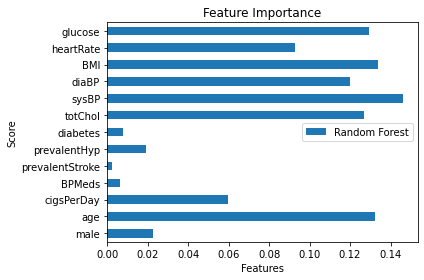

In [18]:
plt.figure()
fi_df.plot(kind= "barh", y=fi_df.columns)
plt.title("Feature Importance")
plt.ylabel("Score")
plt.xlabel("Features")
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# FEATURES ARE REDUCED & ACCURACY IS CHECKED

In [19]:
X_new = x.drop(["diabetes", "prevalentHyp","prevalentStroke","BPMeds"], axis=1)
y_new = y

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [22]:
RFC_clf=RandomForestClassifier(n_estimators=300,min_samples_split=5,max_features='auto')
RFC_clf.fit(X_train,y_train)
RFC_predict = RFC_clf.predict(X_test)
RFC_accuracy = accuracy_score(y_test,RFC_predict)
print(f"Using RFC we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using RFC we get an accuracy of 85.75%


In [23]:
print("Random Forest: Training Data Accuracy is ", RFC_clf.score(X_train,y_train))
print("Random Forest: Test Data Accuracy is ", RFC_clf.score(X_test,y_test))

Random Forest: Training Data Accuracy is  0.9836666666666667
Random Forest: Test Data Accuracy is  0.8575233022636485


In [24]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(RFC_clf, X_new, y_new, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.84154461 0.852      0.848      0.84666667 0.84266667]
The Cross Validation accuracy is: 84.62%


# SMOTE

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [26]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(x, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))

In [27]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


In [28]:
fram = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

In [29]:
x =fram.iloc[:,0:13]  #independent columns
y = fram.iloc[:,-1]    #target column

In [30]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [32]:
RFC_clf=RandomForestClassifier(n_estimators=300,min_samples_split=5,max_features='auto')
RFC_clf.fit(X_train,y_train)
RFC_predict = RFC_clf.predict(X_test)
RFC_accuracy = accuracy_score(y_test,RFC_predict)
print(f"Using RFC we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using RFC we get an accuracy of 86.46%


In [33]:
print("Random Forest: Training Data Accuracy is ", RFC_clf.score(X_train,y_train))
print("Random Forest: Test Data Accuracy is ", RFC_clf.score(X_test,y_test))

Random Forest: Training Data Accuracy is  0.9989073426573427
Random Forest: Test Data Accuracy is  0.8646288209606987


In [34]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(RFC_clf, x, y, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.79650655 0.87325175 0.88374126 0.8784965  0.87587413]
The Cross Validation accuracy is: 86.16%


In [35]:
rf_fi = pd.Series(RFC_clf.feature_importances_, index=fram.columns[0:13])

In [36]:
rf_fi

male               0.015547
age                0.145392
cigsPerDay         0.081902
BPMeds             0.020387
prevalentStroke    0.000884
prevalentHyp       0.016148
diabetes           0.004159
totChol            0.118153
sysBP              0.152862
diaBP              0.116092
BMI                0.106170
heartRate          0.110283
glucose            0.112021
dtype: float64

<Figure size 432x288 with 0 Axes>

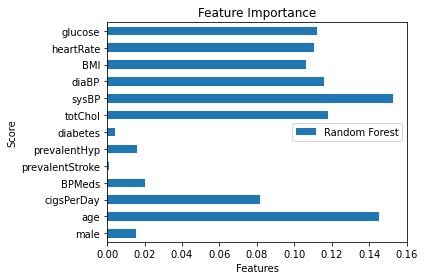

In [37]:
fi_df = pd.concat([rf_fi], axis=1)
fi_df.columns = ["Random Forest"]
plt.figure()
fi_df.plot(kind= "barh", y=fi_df.columns)
plt.title("Feature Importance")
plt.ylabel("Score")
plt.xlabel("Features")
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# REDUCING FEATURES

In [38]:
X_new = x.drop(["diabetes", "prevalentHyp","prevalentStroke","BPMeds"], axis=1)
y_new = y

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [41]:
RFC_clf=RandomForestClassifier(n_estimators=300,min_samples_split=5,max_features='auto')
RFC_clf.fit(X_train,y_train)
RFC_predict = RFC_clf.predict(X_test)
RFC_accuracy = accuracy_score(y_test,RFC_predict)
print(f"Using RFC we get an accuracy of {round(RFC_accuracy*100,2)}%")

Using RFC we get an accuracy of 86.55%


In [42]:
print("Random Forest: Training Data Accuracy is ", RFC_clf.score(X_train,y_train))
print("Random Forest: Test Data Accuracy is ", RFC_clf.score(X_test,y_test))

Random Forest: Training Data Accuracy is  0.9995629370629371
Random Forest: Test Data Accuracy is  0.8655021834061135


In [43]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(RFC_clf, x, y, cv=5) 

print (f"Cross-validated scores {cv_results}")
print(f"The Cross Validation accuracy is: {round(cv_results.mean() * 100,2)}%")

Cross-validated scores [0.80524017 0.8784965  0.88111888 0.88024476 0.87062937]
The Cross Validation accuracy is: 86.31%


# EDA

In [71]:
df = df.rename(columns = {'male': 'sex'}, inplace = False)

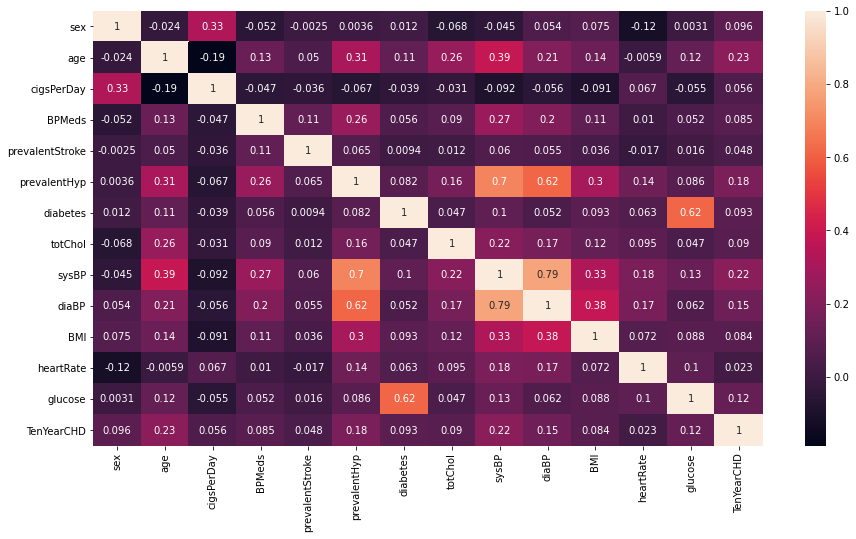

In [72]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [74]:
from scipy import stats

In [75]:
def Calculated_pvalues(dataframe=None):
    #Calcualte the p values

    p_values=np.zeros(shape=(dataframe.shape[1],dataframe.shape[1]))
    for col in dataframe.columns:
        for col2 in dataframe.drop(col, axis=1).columns:
            _,P = stats.pearsonr(dataframe[col],dataframe[col2])
            p_values[dataframe.columns.to_list().index(col),dataframe.columns.to_list().index(col2)] = P
    return p_values

Correlation = df.corr()
P = Calculated_pvalues(df)
print("correlation :", '\n', Correlation)
print("P-values",'\n',P)
print("Pearson correlation test, which fields have a statistically significant")

correlation : 
                       sex       age  cigsPerDay    BPMeds  prevalentStroke  \
sex              1.000000 -0.024142    0.325886 -0.052355        -0.002513   
age             -0.024142  1.000000   -0.188804  0.131690         0.050018   
cigsPerDay       0.325886 -0.188804    1.000000 -0.046625        -0.035713   
BPMeds          -0.052355  0.131690   -0.046625  1.000000         0.111601   
prevalentStroke -0.002513  0.050018   -0.035713  0.111601         1.000000   
prevalentHyp     0.003588  0.305292   -0.067470  0.262955         0.065169   
diabetes         0.011834  0.109321   -0.039436  0.056337         0.009423   
totChol         -0.067595  0.261443   -0.030600  0.089625         0.012297   
sysBP           -0.044515  0.388280   -0.092310  0.269479         0.060421   
diaBP            0.053890  0.205191   -0.056202  0.199282         0.055189   
BMI              0.074868  0.136428   -0.090525  0.105128         0.035568   
heartRate       -0.115444 -0.005893    0.067194 

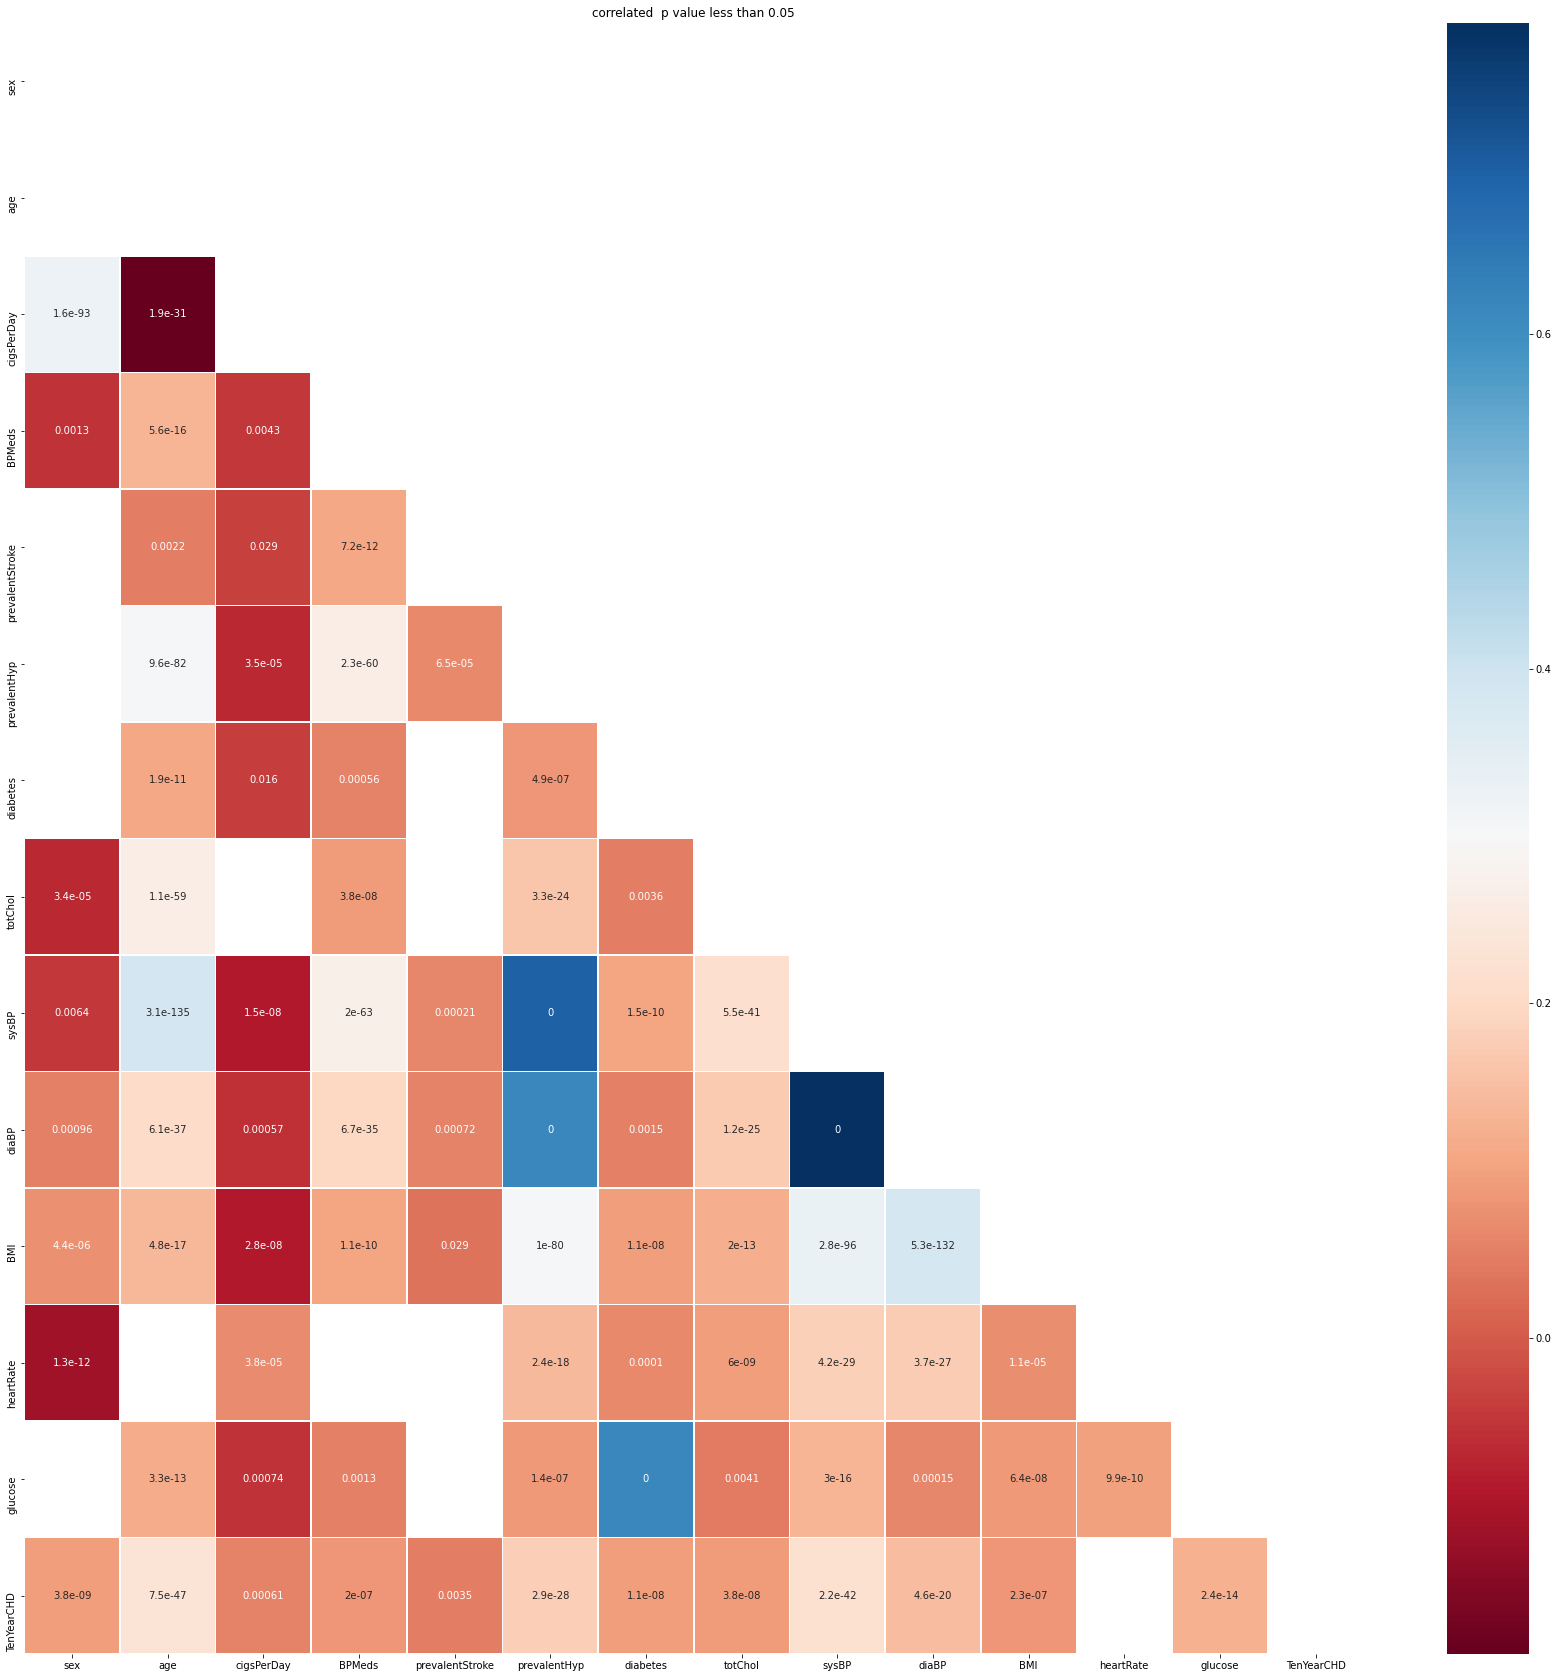

In [80]:
# Heat Map fot the correlated values p value less than 0.05

plt.figure(figsize=(30, 30))
Valus_Mask = np.invert(np.tril(P < 0.05))
Valus_Mask[np.diag_indices(14)] = True
sns.heatmap(df.corr(), xticklabels = df.columns, yticklabels=df.columns, mask=Valus_Mask, annot=P, cmap='RdBu', linewidths=0.5)
plt.title("correlated  p value less than 0.05")
plt.show()